In [9]:
import fastbook
fastbook.setup_book()

In [10]:
from fastbook import *
from fastai.vision.widgets import *

In [11]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [17]:
bear_images = search_images_ddg('grizzly bear black', max_images=150)
len(bear_images), bear_images[0]

(150,
 'https://www.gannett-cdn.com/presto/2021/06/22/NMP2/e4b63a6f-0d3e-4f43-9e1a-743dd1949070-0623_fea_NY_DM_Travel2.jpeg?crop=639,360,x0,y32&width=639&height=360&format=pjpg&auto=webp')

In [18]:
dest = 'images/grizzly_bear.jpg'
download_url(bear_images[0], dest, show_progress=True)

Path('images/grizzly_bear.jpg')

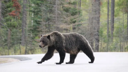

In [19]:
im = Image.open(dest)
im.to_thumb(128, 128)

In [20]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('images/bears')

if not path.exists():
    path.mkdir(parents=True, exist_ok=True)
    for b in bear_types:
        dest = (path/b)
        dest.mkdir(parents=True, exist_ok=True)
        results = search_images_ddg(f'{b} bear', max_images=150)
        download_images(dest, urls=results)

In [21]:
fns = get_image_files(path)
fns

(#392) [Path('images/bears/grizzly/44e0ba5b-1198-40ac-9d24-6ca4272a6305.jpg'),Path('images/bears/grizzly/6461499a-7482-4bbe-9e21-5b149a393aaa.jpg'),Path('images/bears/grizzly/aa0d2a92-3588-46fc-8af3-135320796e42.jpg'),Path('images/bears/grizzly/5ce793b8-0c2e-4279-a30e-08a6c060cbe2.jpg'),Path('images/bears/grizzly/131dab70-d873-4318-9548-25281eaea309.jpg'),Path('images/bears/grizzly/979833fd-5d2f-4a00-bce2-5a8c8ba37fa0.jpg'),Path('images/bears/grizzly/3df83b51-af8d-45dd-8f3c-0d0903fee6de.jpg'),Path('images/bears/grizzly/66c10394-5abc-4796-bd38-b83269cce3e5.jpg'),Path('images/bears/grizzly/fa167c5a-51d3-45d9-9c44-048f1cc87bec.jpg'),Path('images/bears/grizzly/cfab2f68-44f7-4ce2-a8ca-b48244700204.jpg'),Path('images/bears/grizzly/97202baa-989a-41df-9a64-125ca0f61eb2.jpg'),Path('images/bears/grizzly/7ef3c29d-562c-4b47-9908-435dd7bba72f.jpg'),Path('images/bears/grizzly/dd44533d-4e29-4e69-abe8-2076f2b48d59.jpg'),Path('images/bears/grizzly/9c0a11dc-8eec-4f49-8520-519ce9b1f17f.jpg'),Path('images

In [22]:
failed_images = verify_images(fns)
failed_images

(#0) []

In [23]:
failed_images.map(Path.unlink)

(#0) []

In [30]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)


In [31]:
dls = bears.dataloaders(path)

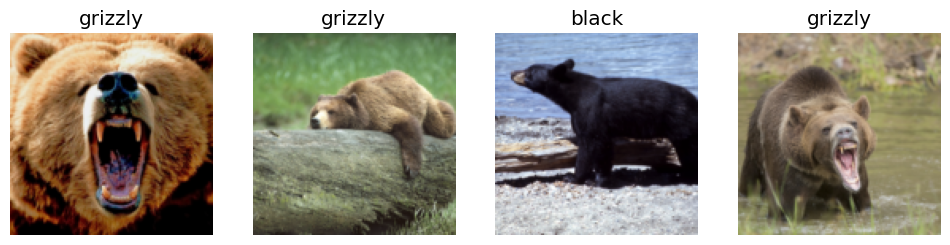

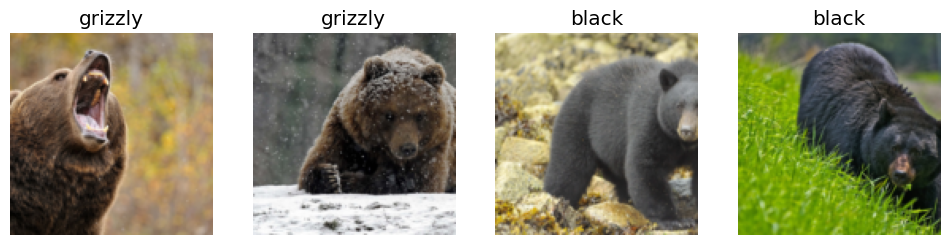

In [34]:
dls.valid.show_batch(max_n=4, nrows=1)
dls.train.show_batch(max_n=4, nrows=1)

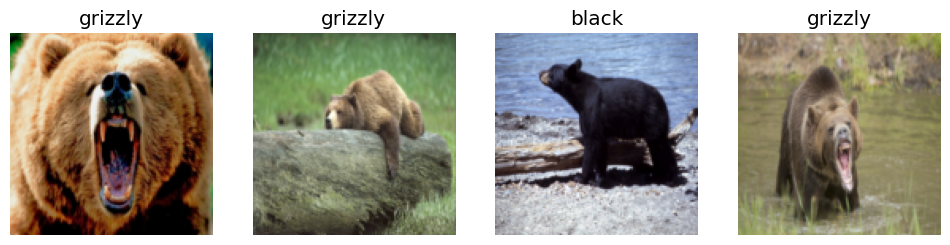

In [36]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls= bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

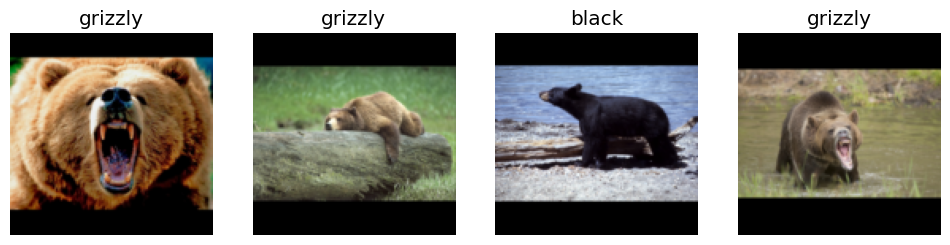

In [38]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

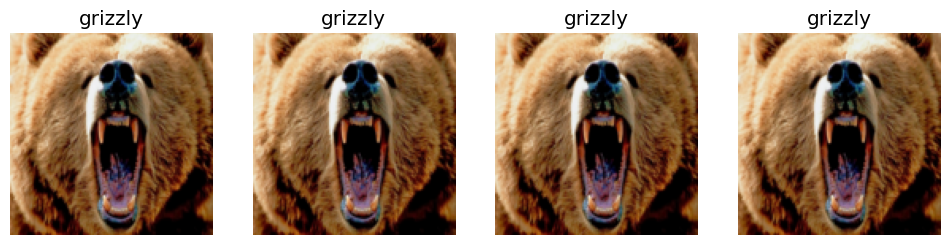

In [40]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1, unique=True)